# Eigenmode

In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
from cavsim2d.cavity import *
# create cavities
cavs = Cavities()
# must first save cavities
cavs.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

# define geometry parameters
midcell = np.array([42, 42, 12, 19, 35, 57.7, 103.353])
endcell_l = np.array([40.34, 40.34, 10, 13.5, 39, 55.716, 103.353])
endcell_r = np.array([42, 42, 9, 12.8, 39, 56.815, 103.353])
# create cavity
cav1 = Cavity(2, midcell, endcell_l, endcell_r, beampipe='both')
cavs.add_cavity([cav1], ['TESLA'])

eigenmode_config = {
    'processes': 3,
    'rerun': True,
    'boundary_conditions': 'mm',
    }
# run eigenmode analysis
cavs.run_eigenmode(eigenmode_config)  #modify to delete UQ results if rerun=True is selected

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


In [3]:
pp.pprint(cavs.eigenmode_qois)

{   'TESLA': {   'Bpk [mT]': 0.0001301621029282863,
                 'Bpk/Eacc [mT/MV/m]': 4.257329644096592,
                 'Eacc [MV/m]': 3.057364916733075e-05,
                 'Epk [MV/m]': 6.197947071518178e-05,
                 'Epk/Eacc []': 2.0272186148263094,
                 'G [Ohm]': 270.1483974704317,
                 'GR/Q [Ohm^2]': 59197.662244483545,
                 'Hpk [A/m]': 0.10357971042136414,
                 'N Cells': 2,
                 'Normalization Length [mm]': 115.4,
                 'Q []': 29110.716511124625,
                 'R/Q [Ohm]': 219.13016252840387,
                 'Req [mm]': 103.353,
                 'Rsh [MOhm]': 6.379036040401029,
                 'Vacc [MV]': 7.056398227819937e-06,
                 'ff [%]': -50.11789901969834,
                 'freq [MHz]': 1300.1262421098,
                 'kcc [%]': 0.9493751970237296}}


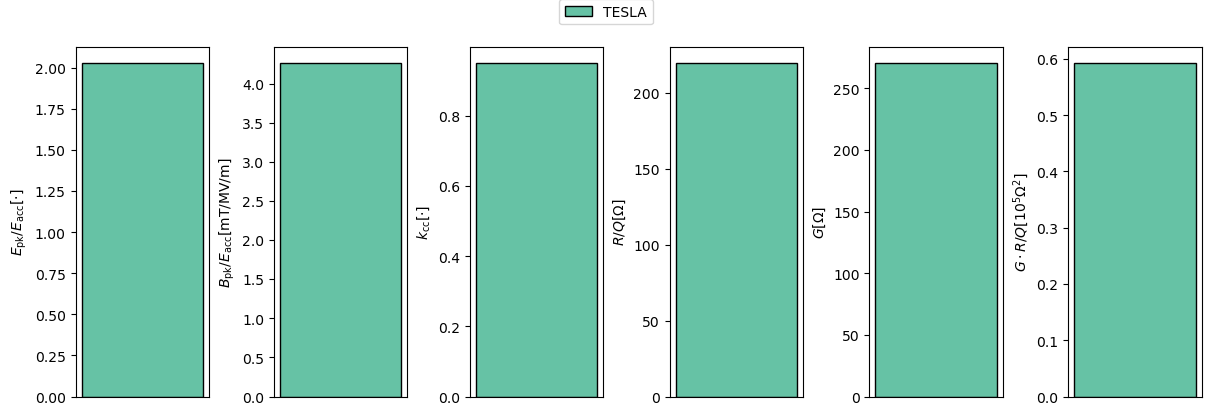

In [4]:
cavs.plot_compare_fm_bar()

# Eigenmode + UQ

In [5]:
from cavsim2d.cavity import *
# create cavities
cavs = Cavities()
# must first save cavities
cavs.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

# define geometry parameters
midcell = np.array([42, 42, 12, 19, 35, 57.7, 103.353])
endcell_l = np.array([40.34, 40.34, 10, 13.5, 39, 55.716, 103.353])
endcell_r = np.array([42, 42, 9, 12.8, 39, 56.815, 103.353])
# create cavity
cav1 = Cavity(2, midcell, endcell_l, endcell_r, beampipe='both')
cavs.add_cavity([cav1], ['TESLA'])

eigenmode_config = {
    'processes': 3,
    'rerun': True,
    'boundary_conditions': 'mm',
    'uq_config': {
        'variables': ['A', 'B', 'a', 'b'],
        'objectives': ["Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "R/Q [Ohm]", "G [Ohm]"],
        'delta': [0.05, 0.05, 0.05, 0.05],
        'processes': 4,
        'distribution': 'gaussian',
        'method': ['Quadrature', 'Stroud3'],
        'cell_type': 'mid-cell',
        'cell complexity': 'multicell'
        }
    }
# run eigenmode analysis
cavs.run_eigenmode(eigenmode_config)  #modify to delete UQ results if rerun=True is selected

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


In [6]:
pp.pprint(cavs.uq_fm_results)

{   'TESLA': {   'Bpk/Eacc [mT/MV/m]': {   'expe': [4.16841699296981],
                                           'stdDev': [0.070970889475463]},
                 'Epk/Eacc []': {   'expe': [2.004311153265275],
                                    'stdDev': [0.03775241238676758]},
                 'G [Ohm]': {   'expe': [264.9529443931898],
                                'stdDev': [2.294906407869116]},
                 'R/Q [Ohm]': {   'expe': [113.65281718240531],
                                  'stdDev': [1.0173023520526212]}}}


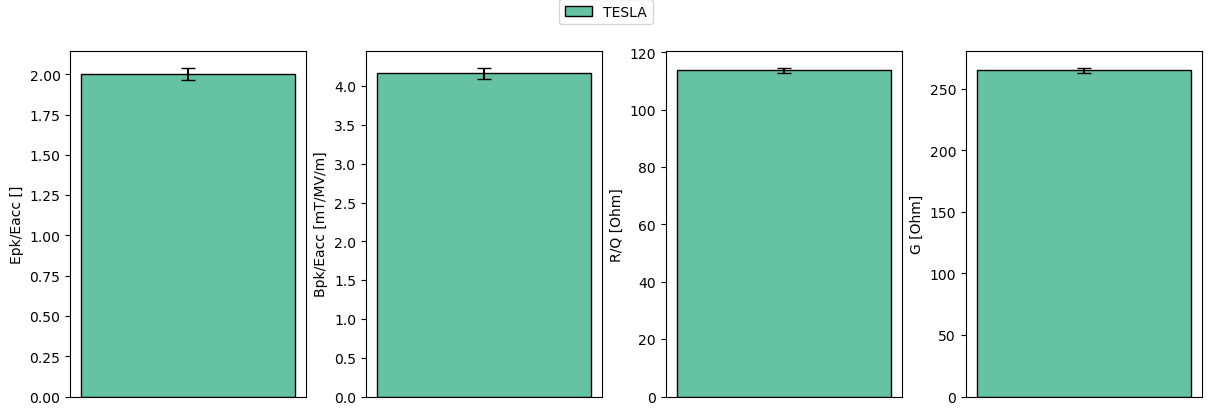

In [7]:
cavs.plot_compare_fm_bar(uq=True)
plt.show()

In [8]:
# cavs.plot_uq_geometries()